In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_from_file(filename):
    my_list = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            my_list.append([float(i[1:-1]) for i in row])
    return my_list

In [3]:
def read_rates(filename):
    server_1_rates = []
    server_2_rates = []
    server_3_rates = []
    server_4_rates = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            server_1_rates.append([float(i.replace('[', '').replace(']', '')) for i in row[:88]])
            server_2_rates.append([float(i.replace('[', '').replace(']', '')) for i in row[88:176]])
            server_3_rates.append([float(i.replace('[', '').replace(']', '')) for i in row[176:264]])
            server_4_rates.append([float(i.replace('[', '').replace(']', '')) for i in row[264:]])
    return server_1_rates, server_2_rates, server_3_rates, server_4_rates


def get_mean_rates(rates_from_file):
    server_1_rates, server_2_rates, server_3_rates, server_4_rates = rates_from_file
    mean_server_1_rates = [np.mean(list(rates)) for rates in server_1_rates]
    mean_server_2_rates = [np.mean(list(rates)) for rates in server_2_rates]
    mean_server_3_rates = [np.mean(list(rates)) for rates in server_3_rates]
    mean_server_4_rates = [np.mean(list(rates)) for rates in server_4_rates]
    return mean_server_1_rates, mean_server_2_rates, mean_server_3_rates, mean_server_4_rates

In [4]:
utilities_0 = read_from_file('base_scripts/results/e0.0/utilities.csv')
rates_from_file_0 = read_rates('base_scripts/results/e0.0/rates.csv')
mean_rates_0 = get_mean_rates(rates_from_file_0)

In [11]:
utilities_01 = read_from_file('base_scripts/results/e0.1/utilities.csv')
rates_from_file_01 = read_rates('base_scripts/results/e0.1/rates.csv')
mean_rates_01 = get_mean_rates(rates_from_file_01)

In [12]:
utilities_02 = read_from_file('base_scripts/results/e0.2/utilities.csv')
rates_from_file_02 = read_rates('base_scripts/results/e0.2/rates.csv')
mean_rates_02 = get_mean_rates(rates_from_file_02)

In [13]:
utilities_03 = read_from_file('base_scripts/results/e0.3/utilities.csv')
rates_from_file_03 = read_rates('base_scripts/results/e0.3/rates.csv')
mean_rates_03 = get_mean_rates(rates_from_file_03)

In [14]:
utilities_04 = read_from_file('base_scripts/results/e0.4/utilities.csv')
rates_from_file_04 = read_rates('base_scripts/results/e0.4/rates.csv')
mean_rates_04 = get_mean_rates(rates_from_file_04)

In [15]:
utilities_05 = read_from_file('base_scripts/results/e0.5/utilities.csv')
rates_from_file_05 = read_rates('base_scripts/results/e0.5/rates.csv')
mean_rates_05 = get_mean_rates(rates_from_file_05)

In [16]:
utilities_06 = read_from_file('base_scripts/results/e0.6/utilities.csv')
rates_from_file_06 = read_rates('base_scripts/results/e0.6/rates.csv')
mean_rates_06 = get_mean_rates(rates_from_file_06)

In [17]:
utilities_07 = read_from_file('base_scripts/results/e0.7/utilities.csv')
rates_from_file_07 = read_rates('base_scripts/results/e0.7/rates.csv')
mean_rates_07 = get_mean_rates(rates_from_file_07)

In [18]:
utilities_08 = read_from_file('base_scripts/results/e0.8/utilities.csv')
rates_from_file_08 = read_rates('base_scripts/results/e0.8/rates.csv')
mean_rates_08 = get_mean_rates(rates_from_file_08)

In [19]:
utilities_09 = read_from_file('base_scripts/results/e0.9/utilities.csv')
rates_from_file_09 = read_rates('base_scripts/results/e0.9/rates.csv')
mean_rates_09 = get_mean_rates(rates_from_file_09)

In [20]:
utilities_1 = read_from_file('base_scripts/results/e1.0/utilities.csv')
rates_from_file_1 = read_rates('base_scripts/results/e1.0/rates.csv')
mean_rates_1 = get_mean_rates(rates_from_file_1)

In [21]:
num_of_servers = 4

## Hospital parameters
- Rates
  - Ambulance arrival rate: $\lambda_2 = 1$
  - Other arrival rate: $\lambda_1 = 0.5$ 
  - Service rate: $\mu = 0.7$
- Resources:
  - Num of servers: $C = 4$
  - Threshold: $T = 7$
  - System capacity: $N = 10$
  - Buffer capacity: $M = 7$ 


## Team priority

Prioritise the experienced staff first
- [Experienced, Mid-level, Mid-level, Intern]

## Old Utility Function

$$
    U_k^3 = e (\text{mean service time})_k + (1 - e) (\text{idle proportion})_k
$$


## Utility functions
Weighted averages of:
- proportion of individuals accepted
- idle time

$$
    U_k = e (\text{proportion of inds accepted}) + (1 - e) (\text{proportion of server idle time})
$$

# e = 0

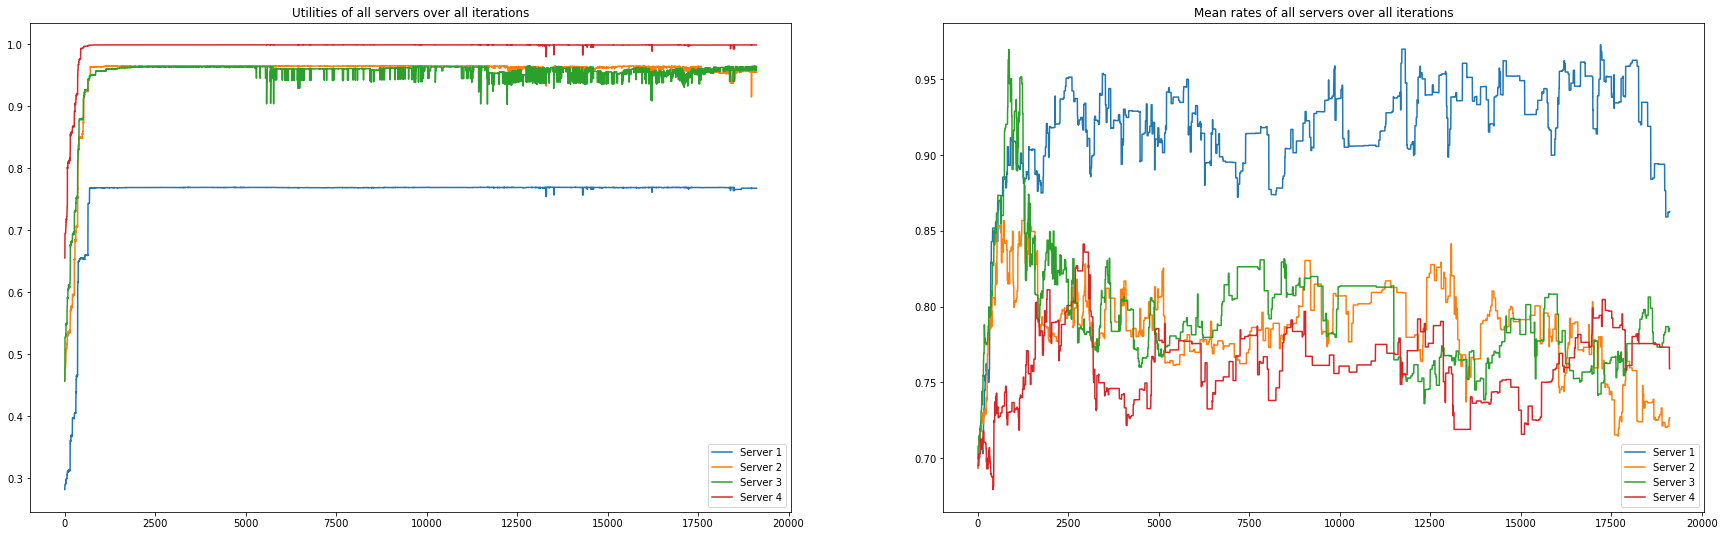

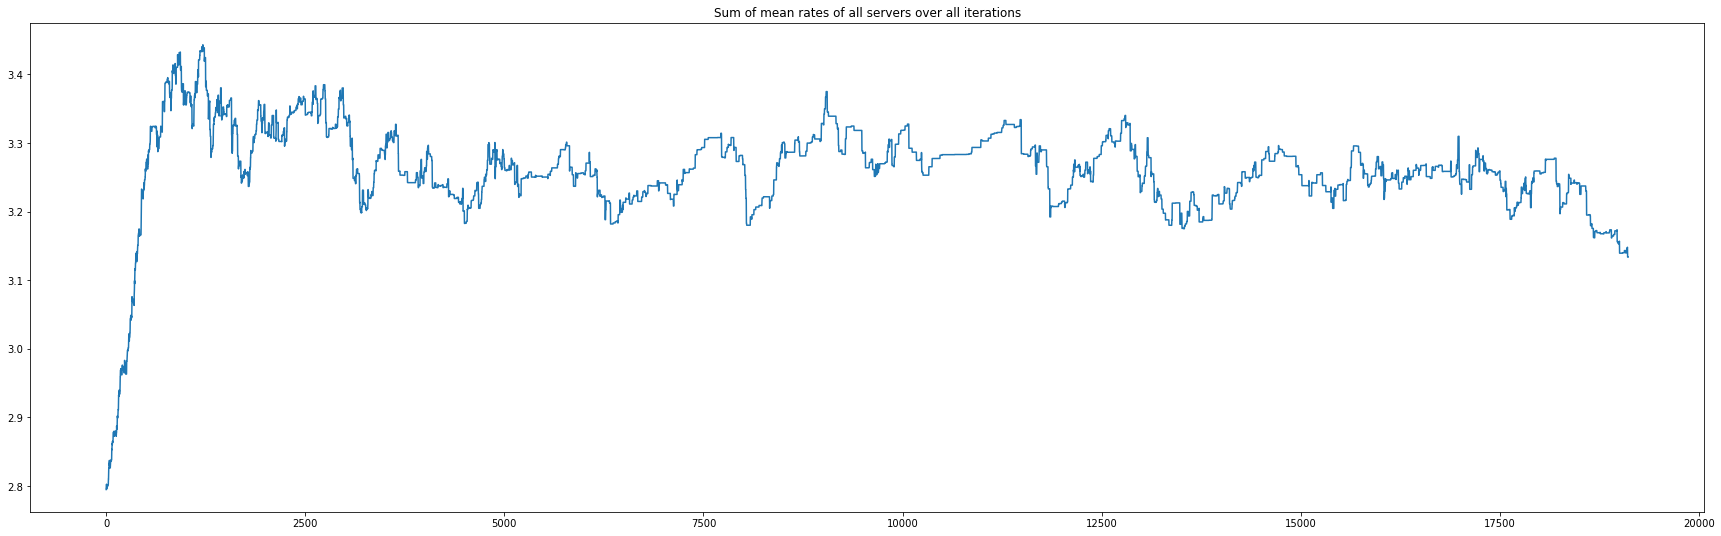

In [103]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
for srv in range(num_of_servers):
    ax1.plot([util[srv] for util in utilities_0])
ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax1.set_title("Utilities of all servers over all iterations")

for srv in range(num_of_servers):
    ax2.plot(mean_rates_0[srv])
    ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax2.set_title("Mean rates of all servers over all iterations")

fig, ax3 = plt.subplots(1, 1, figsize=(30, 9))
overall_mean_rates = [sum(x) for x in zip(*mean_rates_0)]
ax3.plot(overall_mean_rates)
ax3.set_title("Sum of mean rates of all servers over all iterations")
plt.show()

# e = 0.1

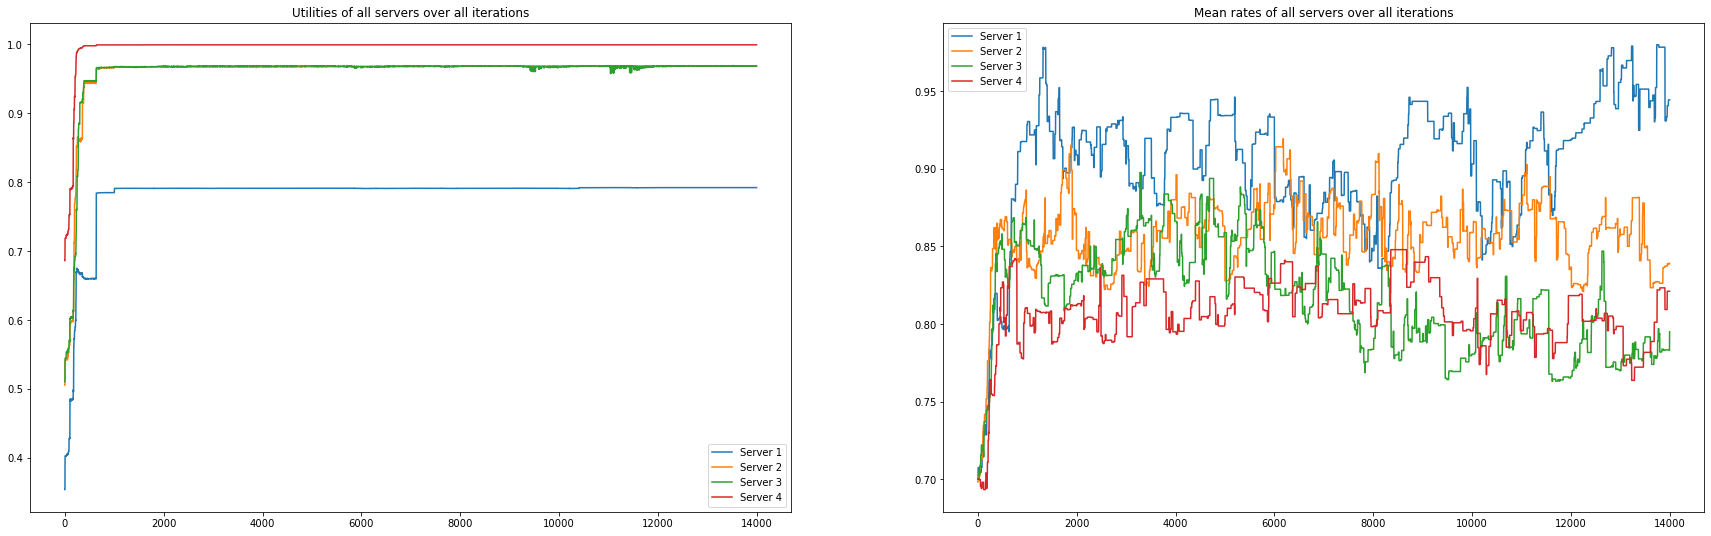

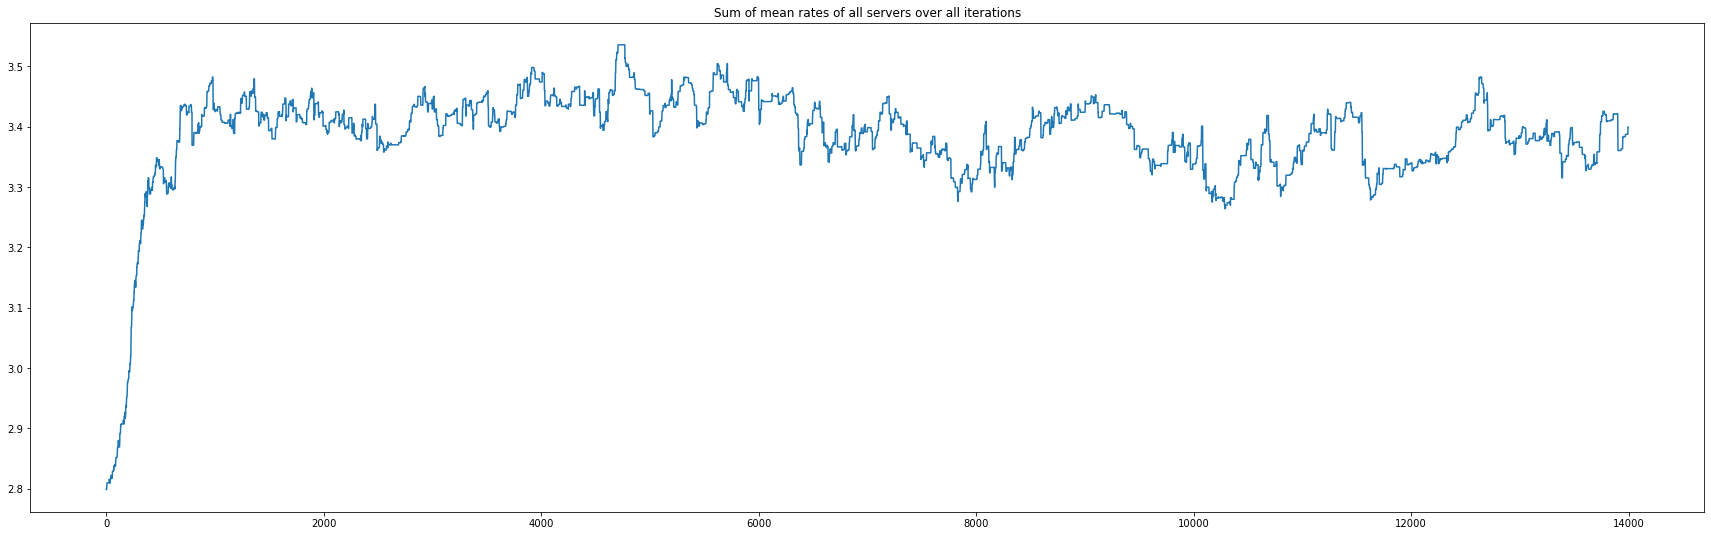

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
for srv in range(num_of_servers):
    ax1.plot([util[srv] for util in utilities_01])
ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax1.set_title("Utilities of all servers over all iterations")

for srv in range(num_of_servers):
    ax2.plot(mean_rates_01[srv])
    ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax2.set_title("Mean rates of all servers over all iterations")

fig, ax3 = plt.subplots(1, 1, figsize=(30, 9))
overall_mean_rates = [sum(x) for x in zip(*mean_rates_01)]
ax3.plot(overall_mean_rates)
ax3.set_title("Sum of mean rates of all servers over all iterations")
plt.show()

# e = 0.2

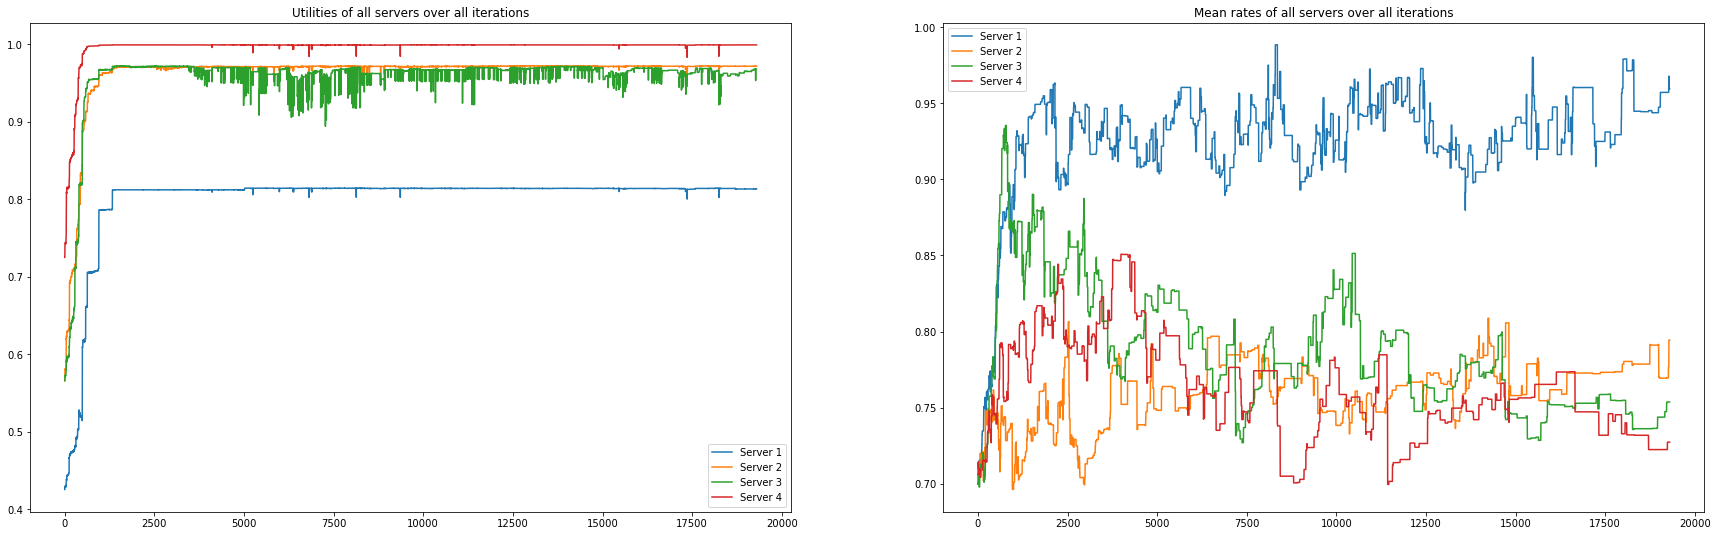

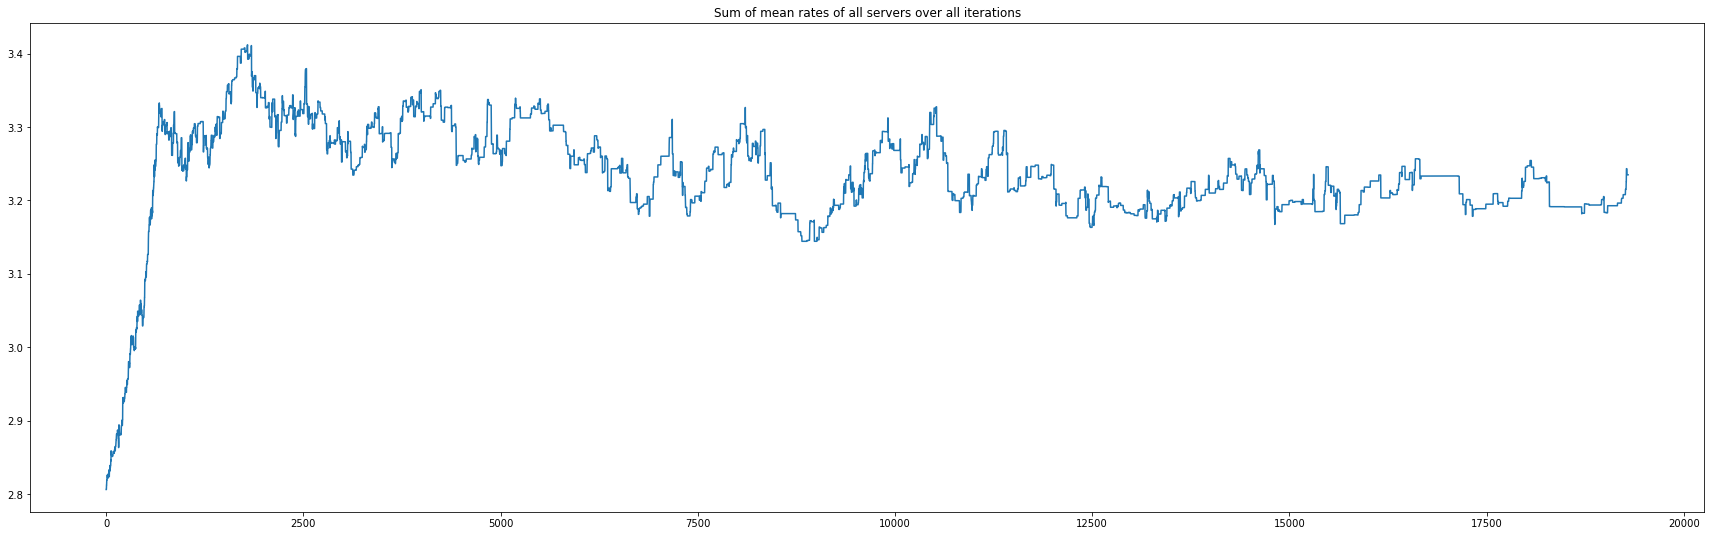

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
for srv in range(num_of_servers):
    ax1.plot([util[srv] for util in utilities_02])
ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax1.set_title("Utilities of all servers over all iterations")

for srv in range(num_of_servers):
    ax2.plot(mean_rates_02[srv])
    ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax2.set_title("Mean rates of all servers over all iterations")

fig, ax3 = plt.subplots(1, 1, figsize=(30, 9))
overall_mean_rates = [sum(x) for x in zip(*mean_rates_02)]
ax3.plot(overall_mean_rates)
ax3.set_title("Sum of mean rates of all servers over all iterations")
plt.show()

# e = 0.3

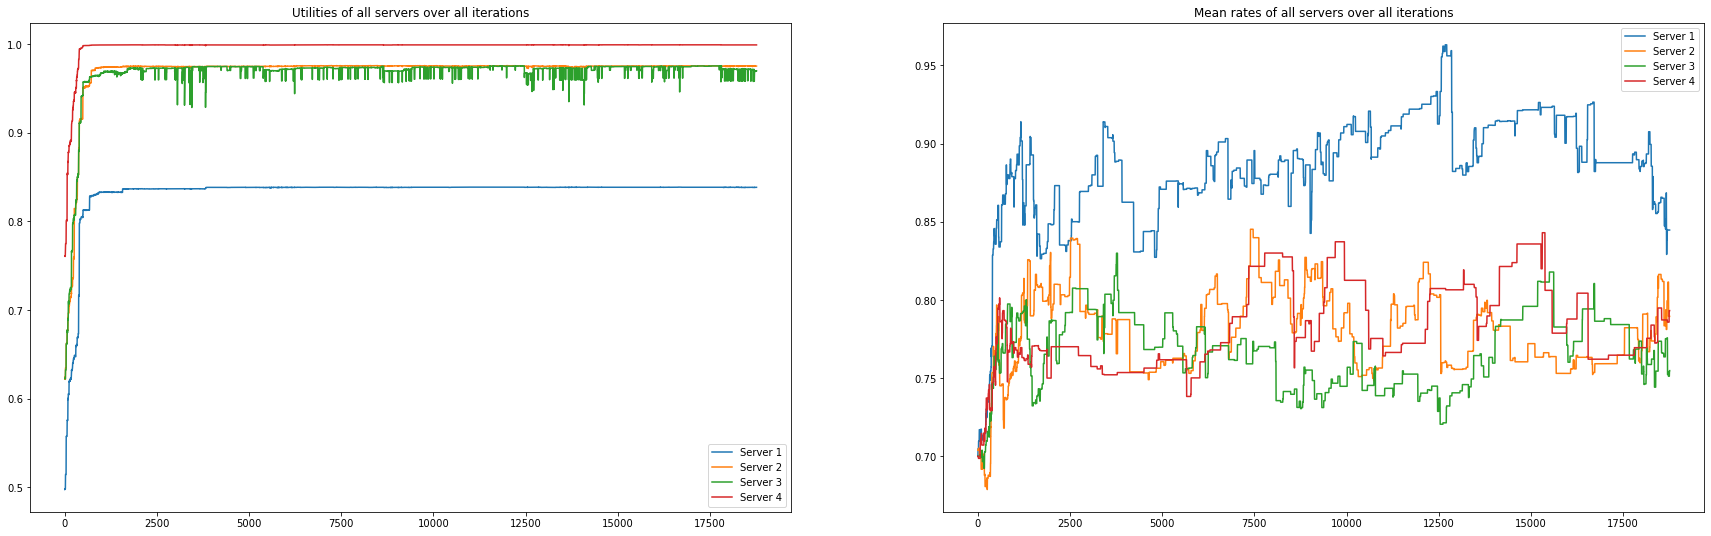

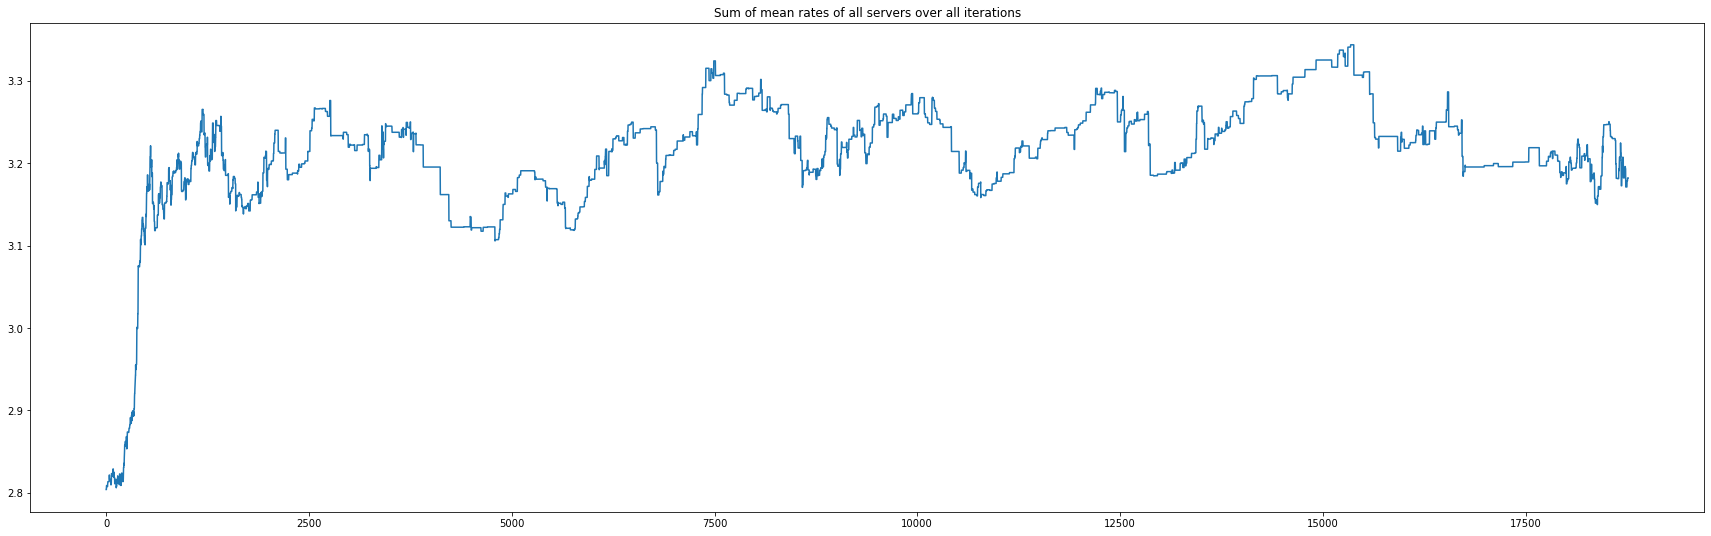

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
for srv in range(num_of_servers):
    ax1.plot([util[srv] for util in utilities_03])
ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax1.set_title("Utilities of all servers over all iterations")

for srv in range(num_of_servers):
    ax2.plot(mean_rates_03[srv])
    ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax2.set_title("Mean rates of all servers over all iterations")

fig, ax3 = plt.subplots(1, 1, figsize=(30, 9))
overall_mean_rates = [sum(x) for x in zip(*mean_rates_03)]
ax3.plot(overall_mean_rates)
ax3.set_title("Sum of mean rates of all servers over all iterations")
plt.show()

# e = 0.4

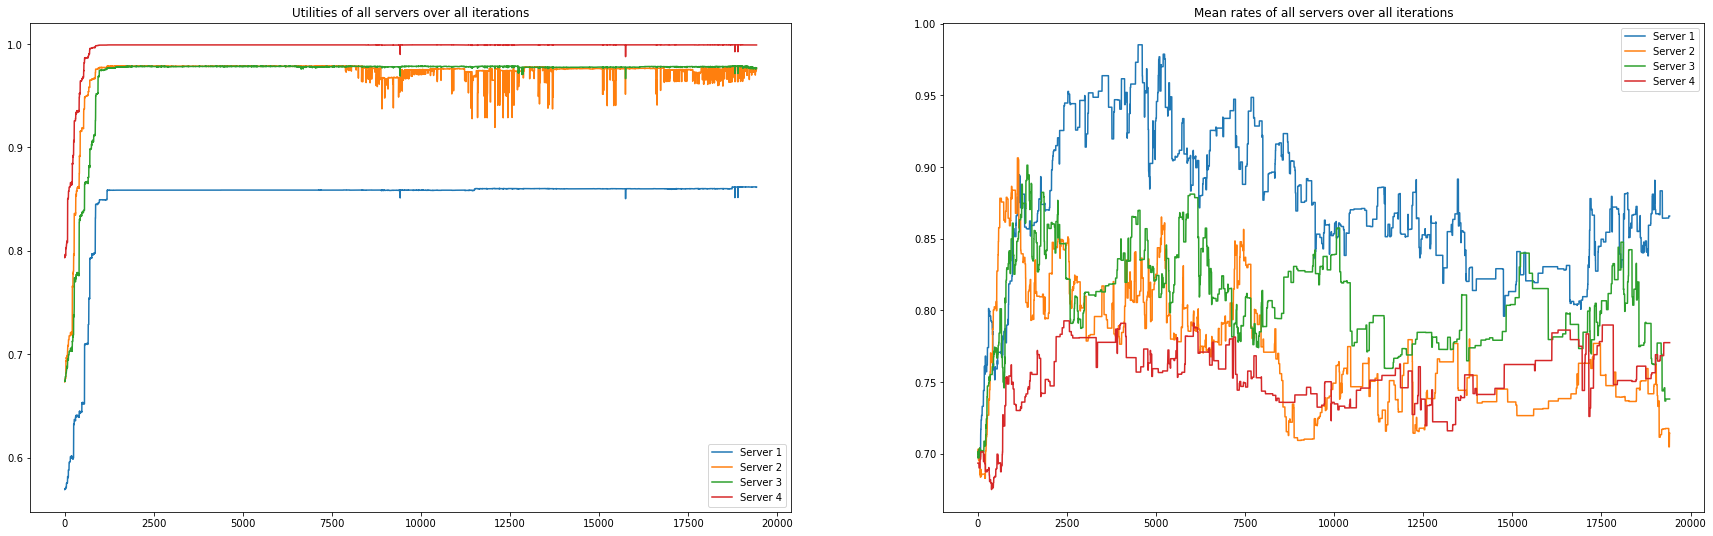

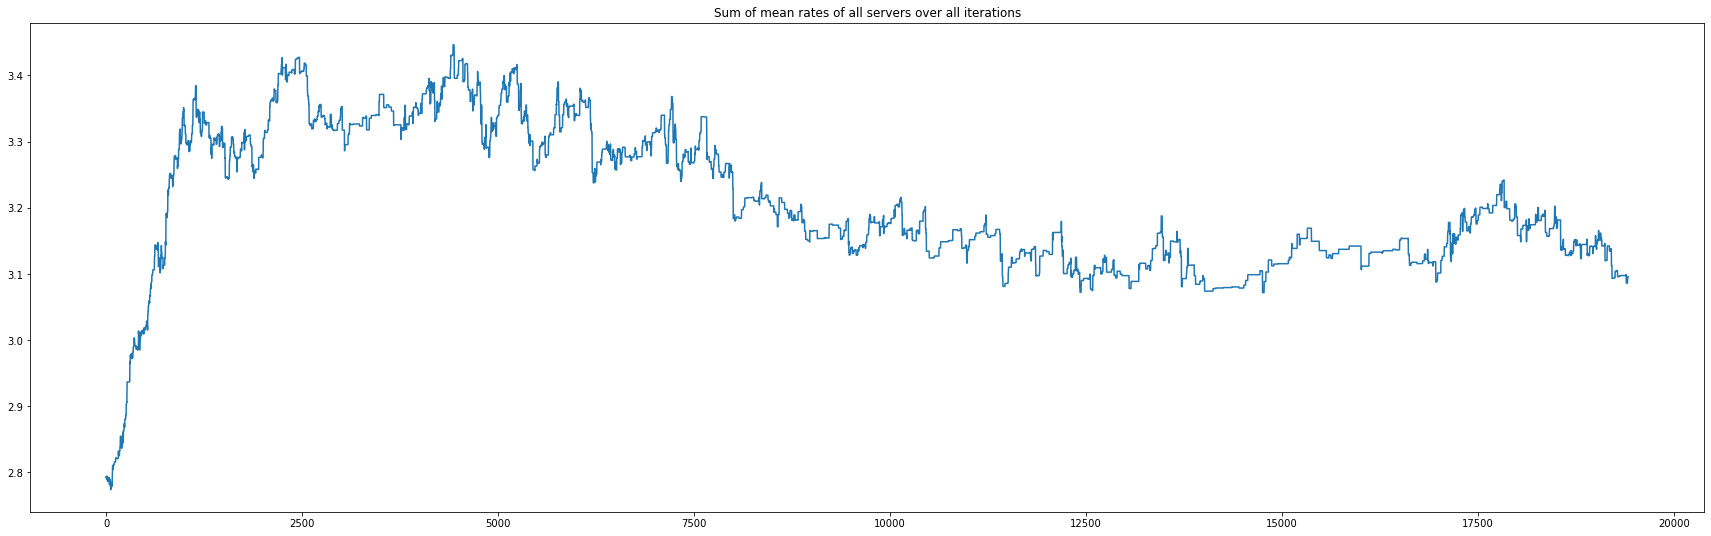

In [99]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
for srv in range(num_of_servers):
    ax1.plot([util[srv] for util in utilities_04])
ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax1.set_title("Utilities of all servers over all iterations")

for srv in range(num_of_servers):
    ax2.plot(mean_rates_04[srv])
    ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax2.set_title("Mean rates of all servers over all iterations")

fig, ax3 = plt.subplots(1, 1, figsize=(30, 9))
overall_mean_rates = [sum(x) for x in zip(*mean_rates_04)]
ax3.plot(overall_mean_rates)
ax3.set_title("Sum of mean rates of all servers over all iterations")
plt.show()

# e = 0.5

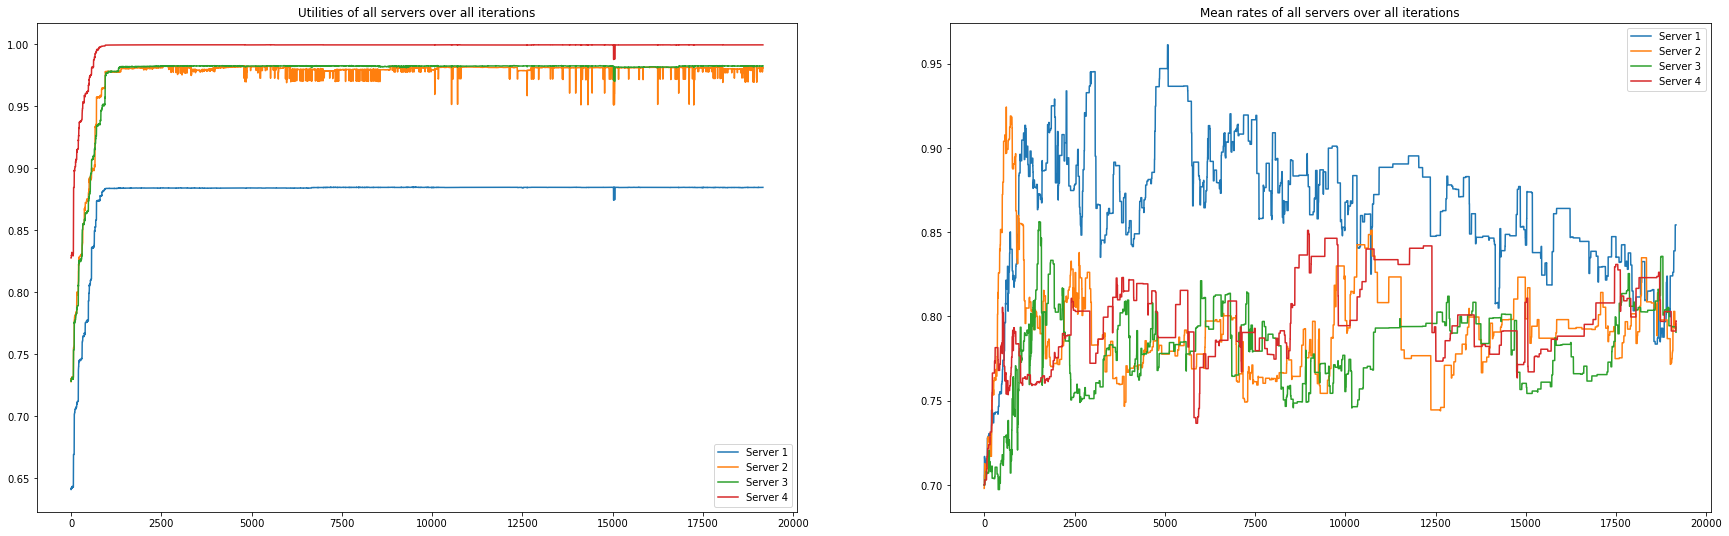

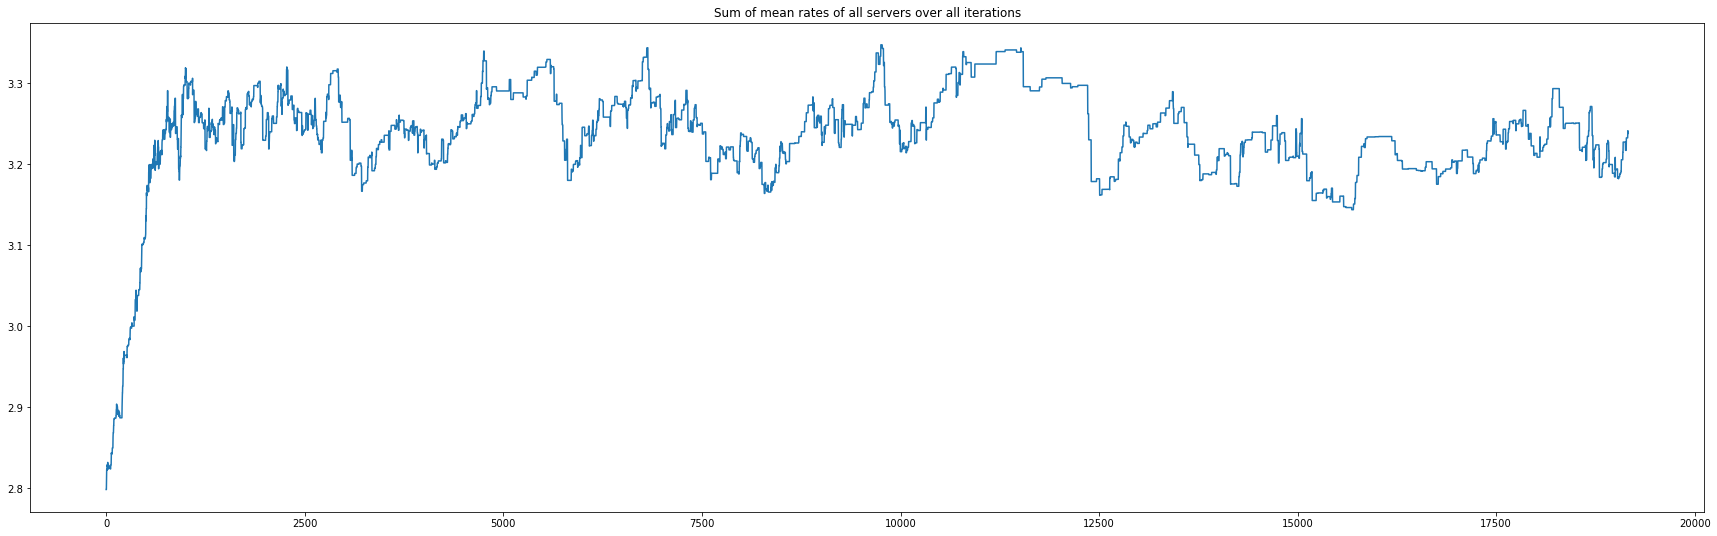

In [98]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
for srv in range(num_of_servers):
    ax1.plot([util[srv] for util in utilities_05])
ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax1.set_title("Utilities of all servers over all iterations")

for srv in range(num_of_servers):
    ax2.plot(mean_rates_05[srv])
    ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax2.set_title("Mean rates of all servers over all iterations")

fig, ax3 = plt.subplots(1, 1, figsize=(30, 9))
overall_mean_rates = [sum(x) for x in zip(*mean_rates_05)]
ax3.plot(overall_mean_rates)
ax3.set_title("Sum of mean rates of all servers over all iterations")
plt.show()

# e = 0.6

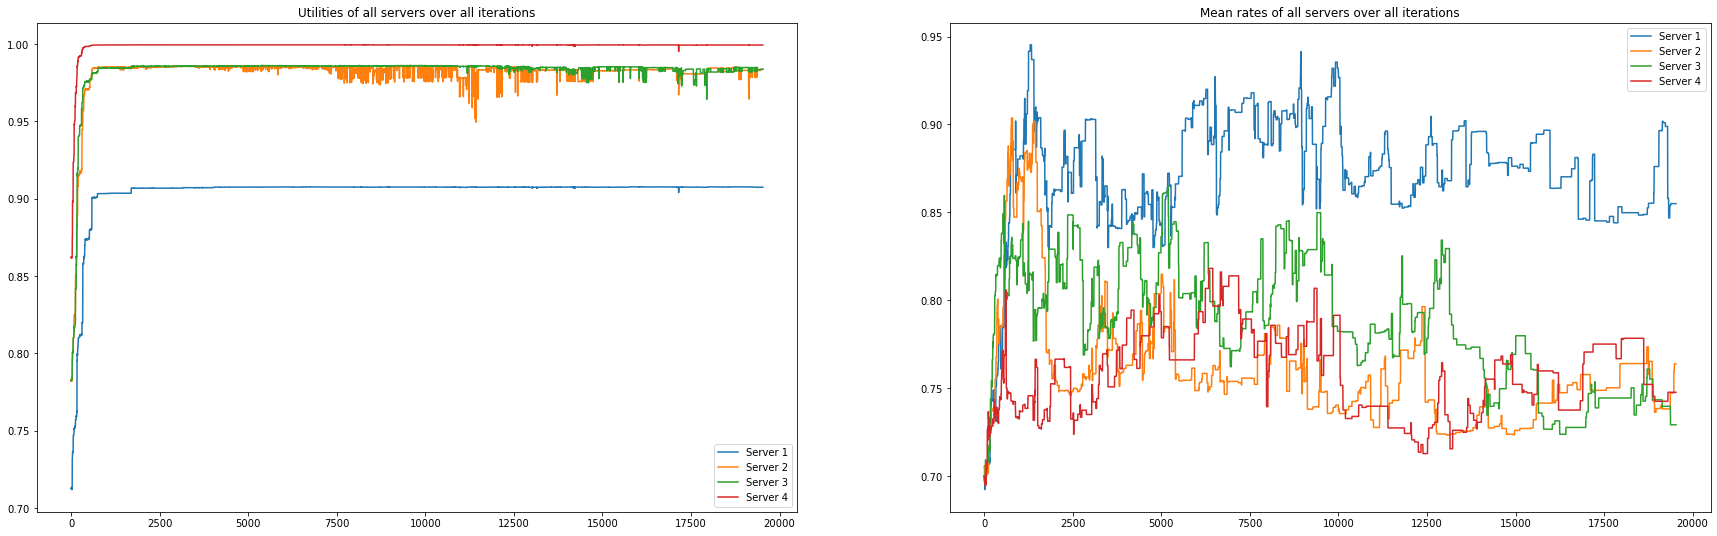

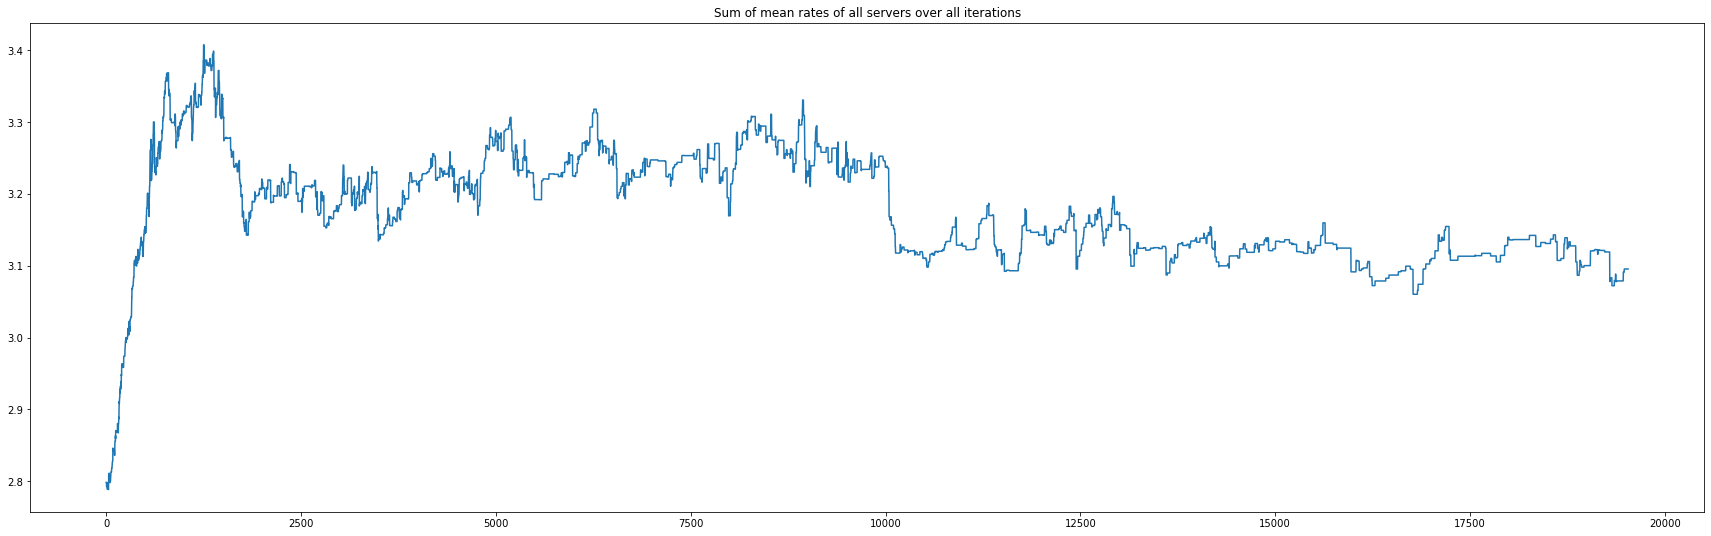

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
for srv in range(num_of_servers):
    ax1.plot([util[srv] for util in utilities_06])
ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax1.set_title("Utilities of all servers over all iterations")

for srv in range(num_of_servers):
    ax2.plot(mean_rates_06[srv])
    ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax2.set_title("Mean rates of all servers over all iterations")

fig, ax3 = plt.subplots(1, 1, figsize=(30, 9))
overall_mean_rates = [sum(x) for x in zip(*mean_rates_06)]
ax3.plot(overall_mean_rates)
ax3.set_title("Sum of mean rates of all servers over all iterations")
plt.show()

# e = 0.7

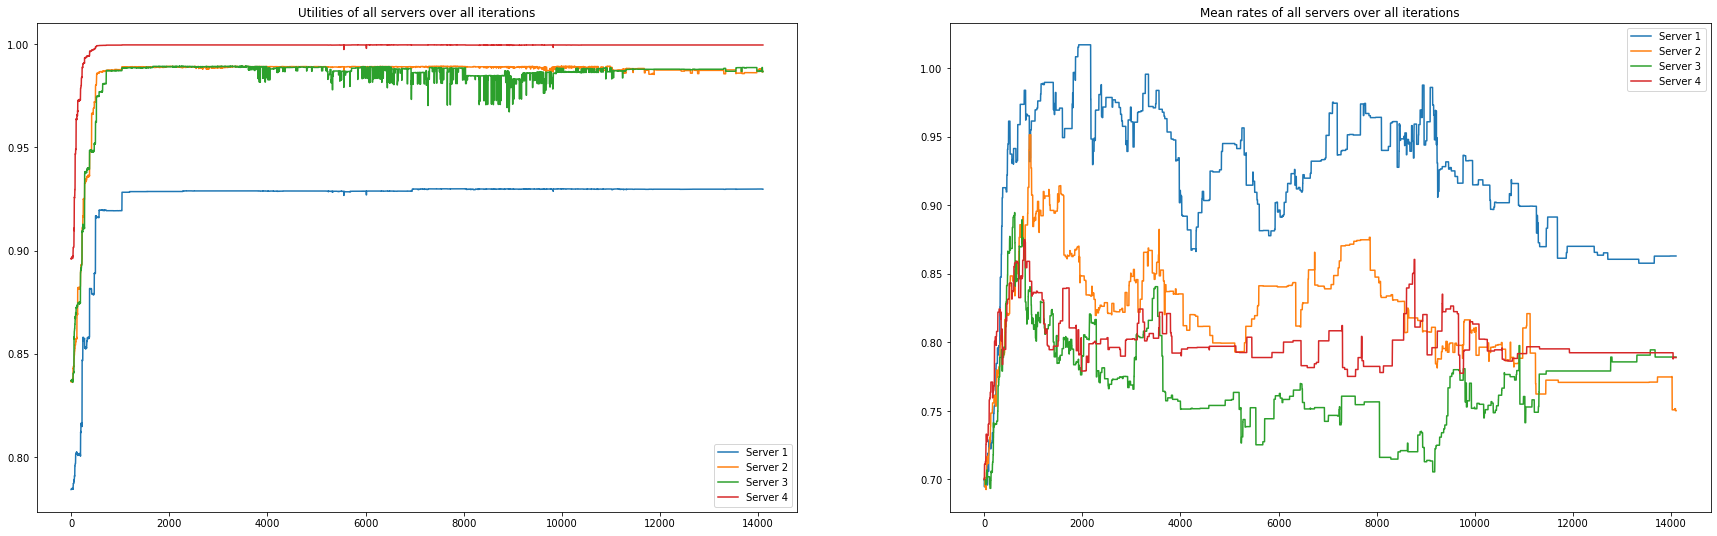

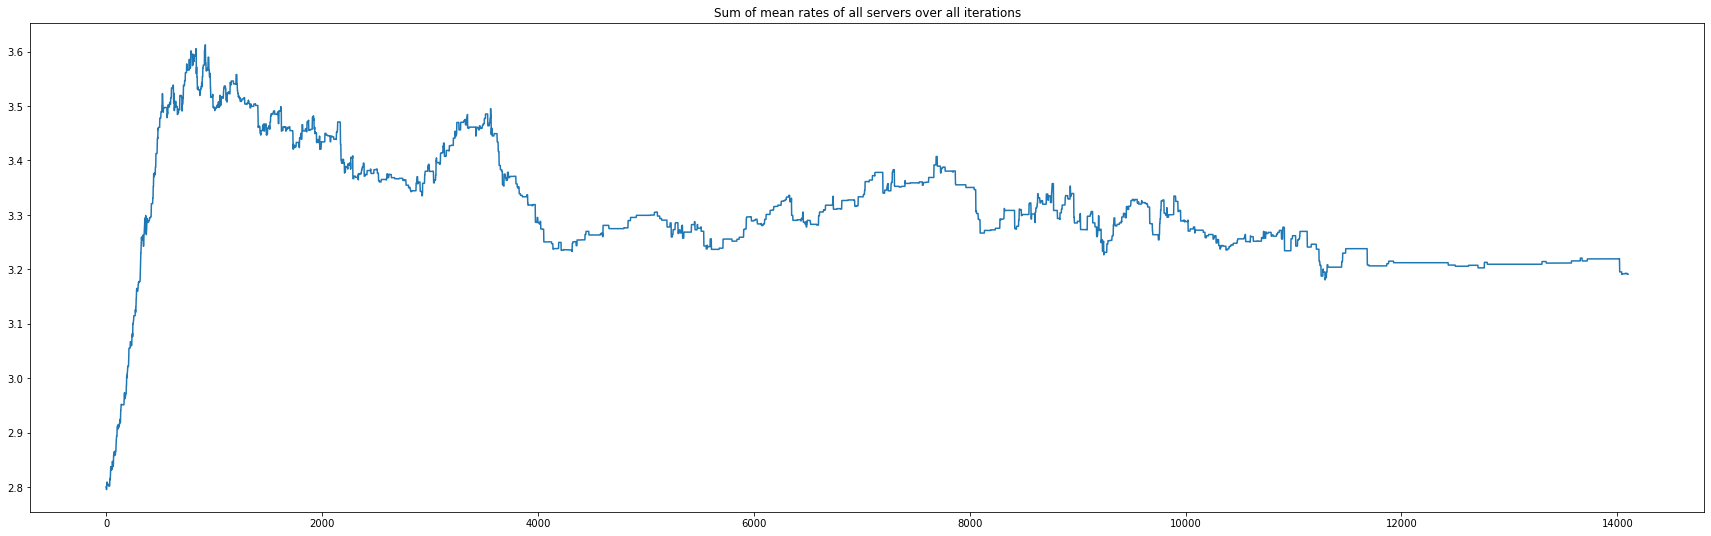

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
for srv in range(num_of_servers):
    ax1.plot([util[srv] for util in utilities_07])
ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax1.set_title("Utilities of all servers over all iterations")

for srv in range(num_of_servers):
    ax2.plot(mean_rates_07[srv])
    ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax2.set_title("Mean rates of all servers over all iterations")

fig, ax3 = plt.subplots(1, 1, figsize=(30, 9))
overall_mean_rates = [sum(x) for x in zip(*mean_rates_07)]
ax3.plot(overall_mean_rates)
ax3.set_title("Sum of mean rates of all servers over all iterations")
plt.show()

# e = 0.8

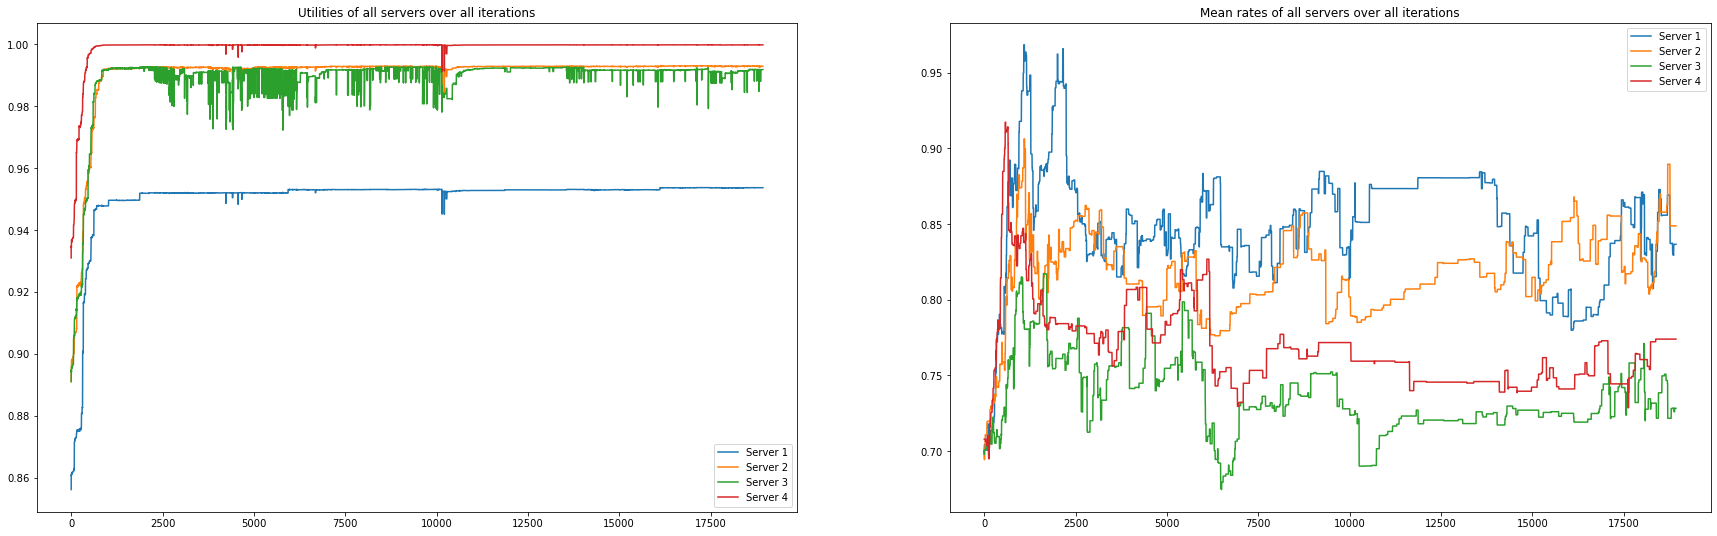

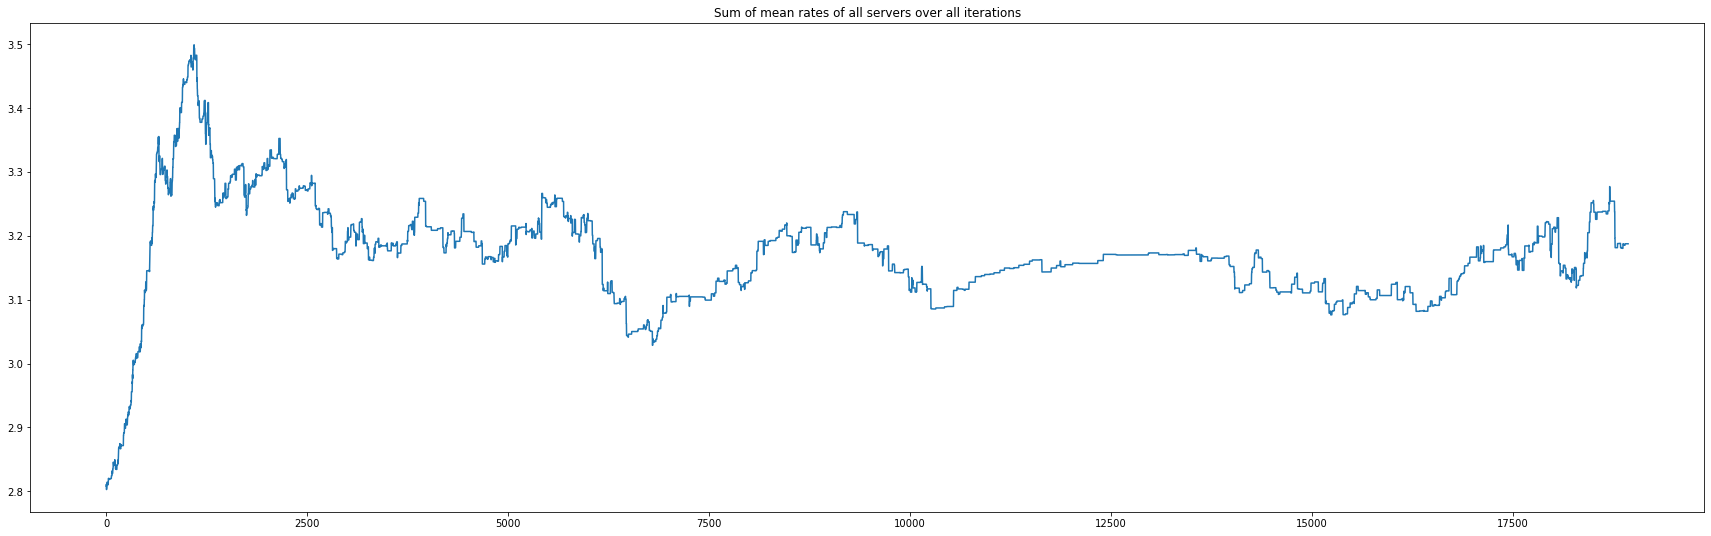

In [94]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
for srv in range(num_of_servers):
    ax1.plot([util[srv] for util in utilities_08])
ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax1.set_title("Utilities of all servers over all iterations")

for srv in range(num_of_servers):
    ax2.plot(mean_rates_08[srv])
    ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax2.set_title("Mean rates of all servers over all iterations")

fig, ax3 = plt.subplots(1, 1, figsize=(30, 9))
overall_mean_rates = [sum(x) for x in zip(*mean_rates_08)]
ax3.plot(overall_mean_rates)
ax3.set_title("Sum of mean rates of all servers over all iterations")
plt.show()

# e = 0.9

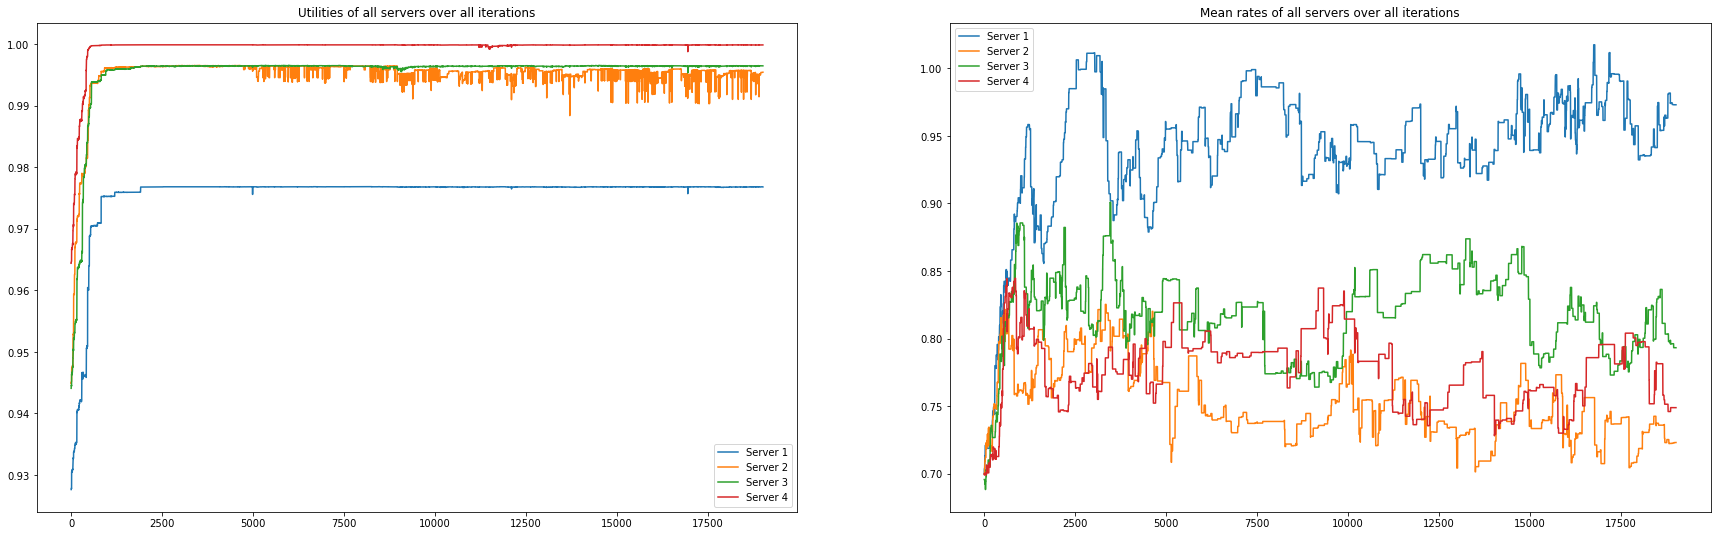

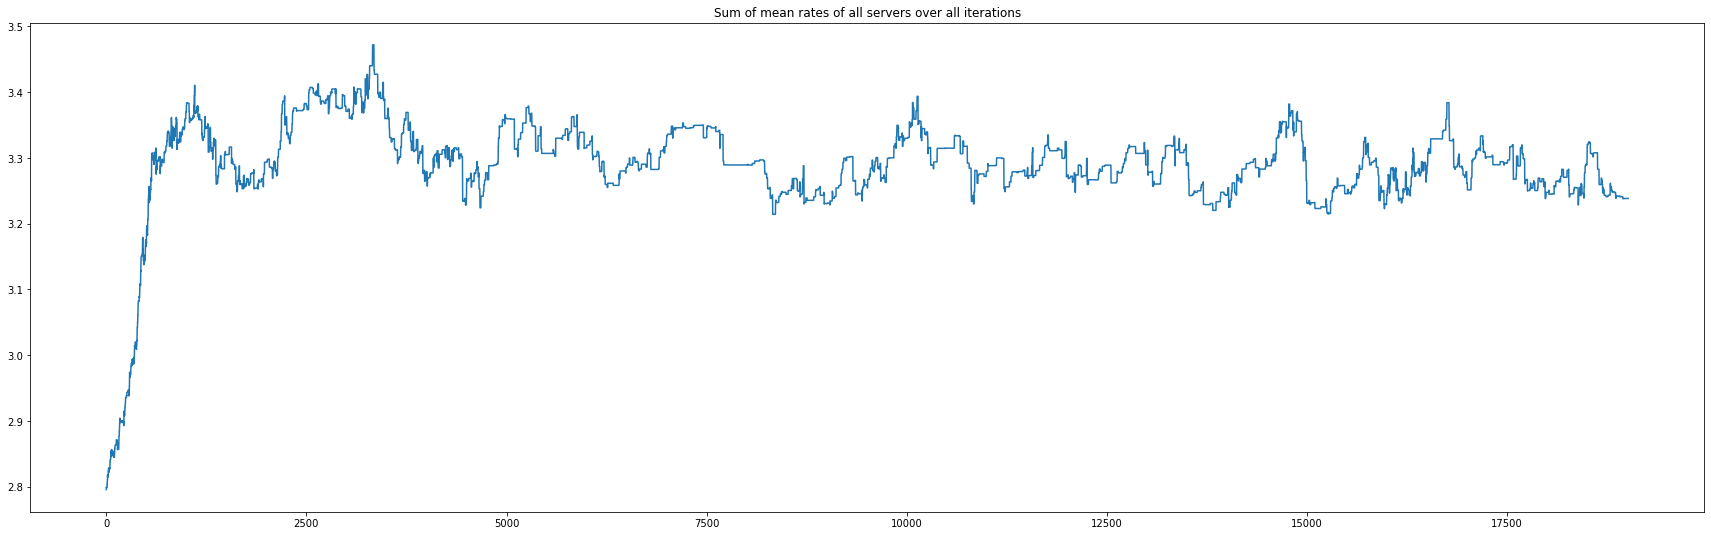

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
for srv in range(num_of_servers):
    ax1.plot([util[srv] for util in utilities_09])
ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax1.set_title("Utilities of all servers over all iterations")

for srv in range(num_of_servers):
    ax2.plot(mean_rates_09[srv])
    ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax2.set_title("Mean rates of all servers over all iterations")

fig, ax3 = plt.subplots(1, 1, figsize=(30, 9))
overall_mean_rates = [sum(x) for x in zip(*mean_rates_09)]
ax3.plot(overall_mean_rates)
ax3.set_title("Sum of mean rates of all servers over all iterations")
plt.show()

# e = 1.0

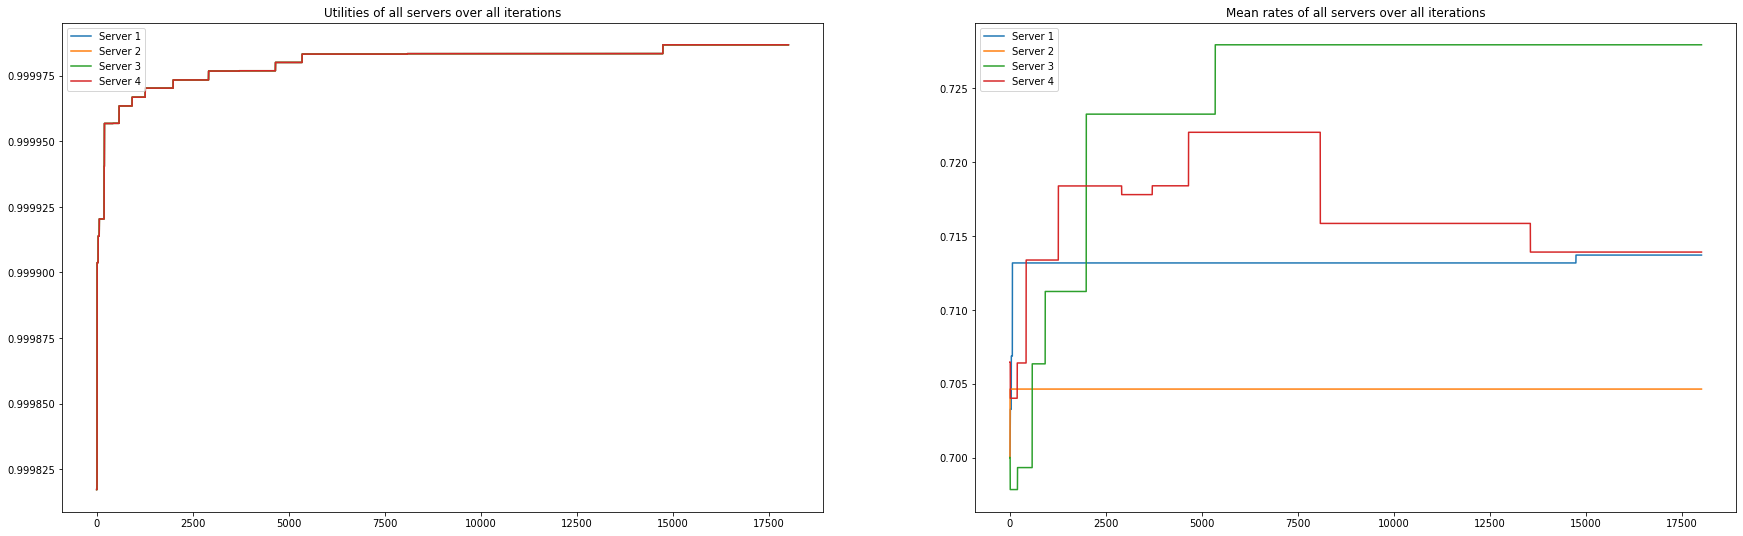

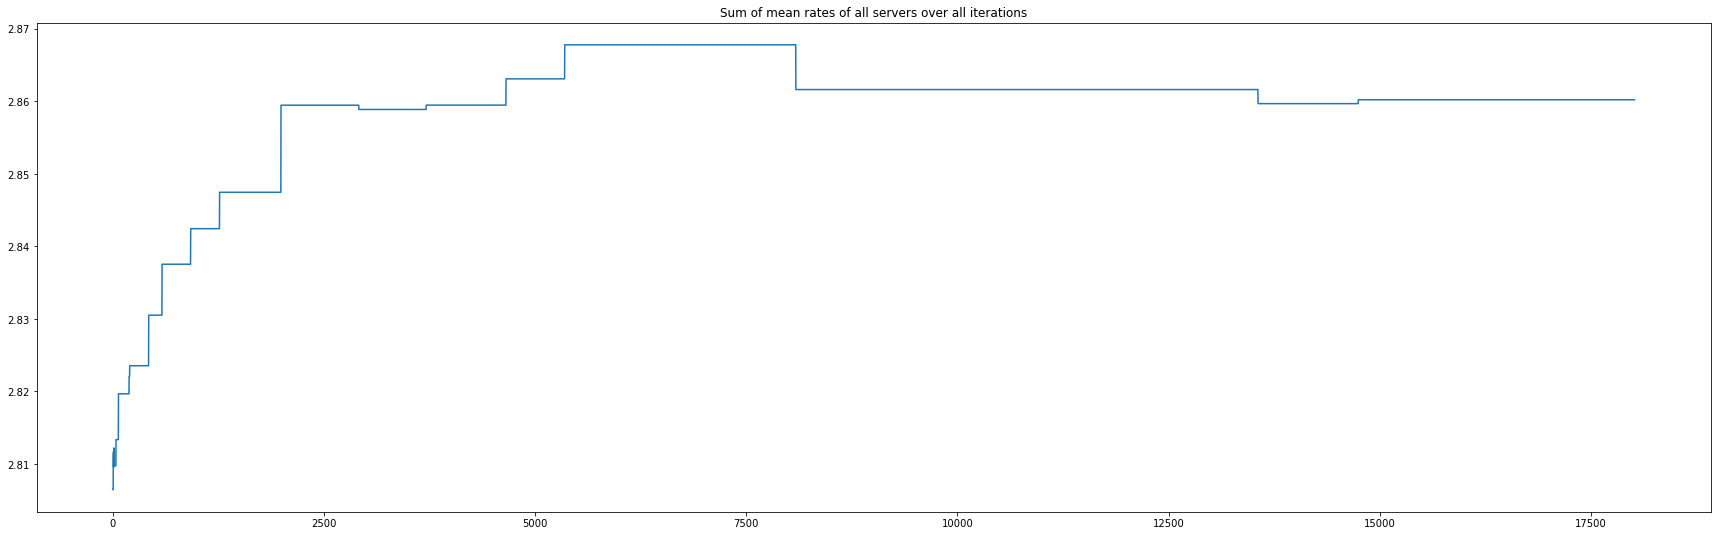

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
for srv in range(num_of_servers):
    ax1.plot([util[srv] for util in utilities_1])
ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax1.set_title("Utilities of all servers over all iterations")

for srv in range(num_of_servers):
    ax2.plot(mean_rates_1[srv])
    ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax2.set_title("Mean rates of all servers over all iterations")

fig, ax3 = plt.subplots(1, 1, figsize=(30, 9))
overall_mean_rates = [sum(x) for x in zip(*mean_rates_1)]
ax3.plot(overall_mean_rates)
ax3.set_title("Sum of mean rates of all servers over all iterations")
plt.show()